<a href="https://colab.research.google.com/github/yoonji0116/IT-class/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_2013408_%EA%B0%95%EC%9C%A4%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **분류과제**



> **통계학과 2013408 강윤지**


**2020년도 건강검진정보 샘플(1만건) 데이터를 이용**

(1) 흥미로운 분류 문제 선정: 종속/독립 변수 선택 
   - 수치 데이터를 범주형으로 변경 가능 (예. 이진 클래스로 변경: 0.5 이상 Y, 0.5 미만 N)
   - 건강검진 데이터에 다른 외부 데이터를 연결해서 이용도 가능
   - 필요한 경우 데이터 전처리 및 파생변수 생성 

(2) 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과 
   - 적절한 평가 방법 1개 선택 
   - 분류 모델의 종류는 3개 이하로 선택, 수업시간에 배우지 않은 분류 모델도 사용 가능 

(3) 분류 모델을 통한 인사이트 도출:  중요 변수 설명 등  

(4) 코드는 github에 올리고 주소 제출



In [42]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import mglearn

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# health 데이터 가져오기
import pandas as pd

health = pd.read_csv("/content/drive/My Drive/3-2/IT class/health_data.csv")
display(health.head()) 
print(health.info())  

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [46]:
# 변수명을 사용하기 쉽게 변경
health = health.rename(columns = {'성별코드':'성별', '연령대코드(5세단위)':'연령대', '신장(5Cm단위)':'신장', '체중(5Kg 단위)':'체중'})

In [47]:
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

In [48]:
# 필요한 패키지와 라이브러리를 가져옴
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프를 화면 안에 그리기 위한 설정
%matplotlib inline


!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [49]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus']=False

In [50]:
# 결측치 있는 행 제거
health.info()
health = health.dropna(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준년도        10000 non-null  int64  
 1   가입자일련번호     10000 non-null  int64  
 2   시도코드        10000 non-null  int64  
 3   성별          10000 non-null  object 
 4   연령대         10000 non-null  int64  
 5   신장          10000 non-null  int64  
 6   체중          10000 non-null  int64  
 7   허리둘레        10000 non-null  float64
 8   시력(좌)       10000 non-null  float64
 9   시력(우)       10000 non-null  float64
 10  청력(좌)       10000 non-null  int64  
 11  청력(우)       10000 non-null  int64  
 12  수축기혈압       9912 non-null   float64
 13  이완기혈압       9912 non-null   float64
 14  식전혈당(공복혈당)  9912 non-null   float64
 15  총콜레스테롤      4044 non-null   float64
 16  트리글리세라이드    4044 non-null   float64
 17  HDL콜레스테롤    4044 non-null   float64
 18  LDL콜레스테롤    3977 non-null   float64
 19  혈색소         9912 non-null 

###**# BMI 변수를 추가로 생성함**

**BMI: 비만 판정하는 방법의 하나로 체중(kg)을 신장(m)의 제곱으로 나눈 값(체중(kg)/신장(m^2))**

- 저체중: <18.5

- 정상체중: 18.5~22.9

- 과체중: 23~24.9

- 비만I: 25~29.9

- 비만II: 30~39.9

- 심각한 비만III: >=40

(출처: https://url.kr/coayj2)

In [51]:
data1 = health
data1['BMI'] = data1['체중'] / ((data1['신장'] * 0.01) * data1['신장'] * 0.01)
# 신장의 데이터가 cm로 되어 있기 때문에 0.01을 곱해 m로 바꿔줌

display(data1.head()) # BMI 변수가 잘 추가되었는지 확인

,기준년도,가입자일련번호,시도코드,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,BMI
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021,29.384757
16,2020,17,30,M,11,160,65,90.0,0.6,0.6,...,29.0,54.0,24.0,No,Yes,1,0.0,1.0,12/29/2021,25.390625
21,2020,22,41,F,11,155,50,65.9,0.7,1.0,...,24.0,14.0,12.0,No,No,1,0.0,0.0,12/29/2021,20.811655
27,2020,28,11,M,17,155,60,82.0,0.5,0.7,...,33.0,22.0,29.0,No,Yes,1,0.0,0.0,12/29/2021,24.973985
47,2020,48,26,M,16,165,65,94.0,1.5,0.6,...,28.0,20.0,43.0,No,Yes,1,0.0,0.0,12/29/2021,23.875115


In [70]:
# 이진 클래스
# BMI가 23 미만일 경우 (저체중, 정상) -> safe로 분류
# BMI가 23 이상일 경우 (과체중, 비만) -> Danger로 분류

BMI_class = []
for i in data1['BMI'] : 
  if i < 23:
    BMI_class.append('safe')
  else:
    BMI_class.append('Danger')
data1['BMI_class'] = BMI_class

display(data1.head()) # BMI_class 변수가 잘 추가되었는지 확인

,기준년도,가입자일련번호,시도코드,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,BMI,BMI_class
6,2020,7,44,1,9,165,80,93.0,0.8,0.7,...,20.0,35.0,2,1,1,0.0,1.0,0,29.384757,Danger
16,2020,17,30,1,11,160,65,90.0,0.6,0.6,...,54.0,24.0,0,1,1,0.0,1.0,0,25.390625,Danger
21,2020,22,41,0,11,155,50,65.9,0.7,1.0,...,14.0,12.0,0,0,1,0.0,0.0,0,20.811655,safe
27,2020,28,11,1,17,155,60,82.0,0.5,0.7,...,22.0,29.0,0,1,1,0.0,0.0,0,24.973985,Danger
47,2020,48,26,1,16,165,65,94.0,1.5,0.6,...,20.0,43.0,0,1,1,0.0,0.0,0,23.875115,Danger


Danger    758
safe      491
Name: BMI_class, dtype: int64


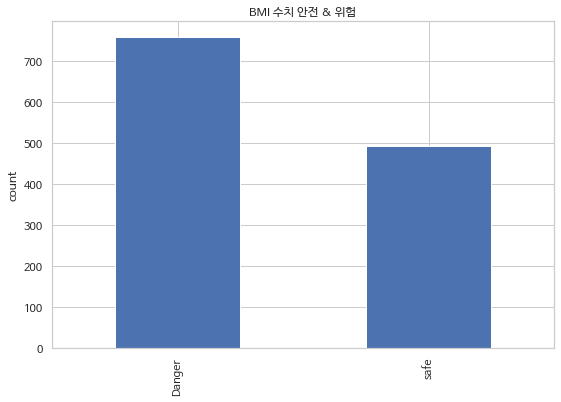

In [113]:
print(data1['BMI_class'].value_counts())

data1['BMI_class'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('BMI 수치 안전 & 위험')
plt.show()




**성별, 연령, 허리둘레, 흡연, 음주가 비만에 미치는 영향을 알아보려고 한다.** 

(BMI가 23 미만일 경우 safe로 분류하고, BMI가 23 이상일 경우 Danger로 분류한다.)

**독립변수: 성별, 연령대, 허리둘레, 흡연상태, 음주여부**

**종속변수: BMI_class**


In [53]:
data2 = data1
# 문자형 변수를 수치화 해줌
from sklearn.preprocessing import LabelEncoder
m = (data2.dtypes == 'object')
object_type = list(m[m].index)

print("문자형:", object_type)

문자형: ['성별', '흡연상태', '음주여부', '데이터공개일자', 'BMI_class']


In [54]:
LE = LabelEncoder()

for i in object_type:
    data2[i]=data2[[i]].apply(LE.fit_transform)

display(data2.head())
print(data2.info())


# 성별 (F -> 0, M -> 1)
# 흡연여부 (N -> 0, NOTNOW-> 1, Y -> 2)
# 음주여부(N -> 0, Y -> 1)
# BMI_class ( Danger -> 0, Safe -> 1)

,기준년도,가입자일련번호,시도코드,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,BMI,BMI_class
6,2020,7,44,1,9,165,80,93.0,0.8,0.7,...,20.0,35.0,2,1,1,0.0,1.0,0,29.384757,0
16,2020,17,30,1,11,160,65,90.0,0.6,0.6,...,54.0,24.0,0,1,1,0.0,1.0,0,25.390625,0
21,2020,22,41,0,11,155,50,65.9,0.7,1.0,...,14.0,12.0,0,0,1,0.0,0.0,0,20.811655,1
27,2020,28,11,1,17,155,60,82.0,0.5,0.7,...,22.0,29.0,0,1,1,0.0,0.0,0,24.973985,0
47,2020,48,26,1,16,165,65,94.0,1.5,0.6,...,20.0,43.0,0,1,1,0.0,0.0,0,23.875115,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준년도        1249 non-null   int64  
 1   가입자일련번호     1249 non-null   int64  
 2   시도코드        1249 non-null   int64  
 3   성별          1249 non-null   int64  
 4   연령대         1249 non-null   int64  
 5   신장          1249 non-null   int64  
 6   체중          1249 non-null   int64  
 7   허리둘레        1249 non-null   float64
 8   시력(좌)       1249 non-null   float64
 9   시력(우)       1249 non-null   float64
 10  청력(좌)       1249 non-null   int64  
 11  청력(우)       1249 non-null   int64  
 12  수축기혈압       1249 non-null   float64
 13  이완기혈압       1249 non-null   float64
 14  식전혈당(공복혈당)  1249 non-null   float64
 15  총콜레스테롤      1249 non-null   float64
 16  트리글리세라이드    1249 non-null   float64
 17  HDL콜레스테롤    1249 non-null   float64
 18  LDL콜레스테롤    1249 non-null   float64
 19  혈색소         1249 non-null  

#**의사결정나무**



In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = data2.iloc[:, [3, 4, 7, 25, 26]]
Y = data2.iloc[:, 32]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.964
시험용 데이터 정확도: 0.776


In [58]:
# 의사결정나무의 깊이를 4로 제한

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.851
시험용 데이터 정확도: 0.808


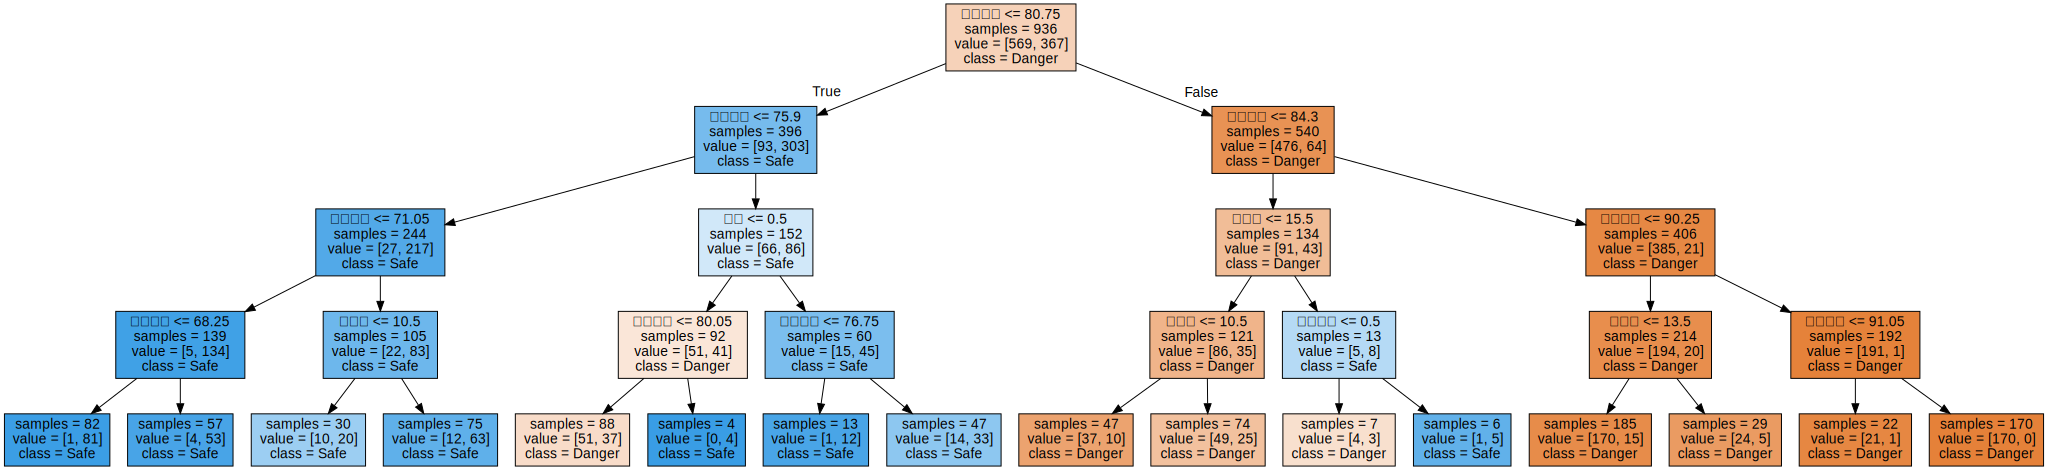

In [59]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=["Danger", "Safe"],
                feature_names=data2.columns[[3, 4, 7, 25, 26]], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))


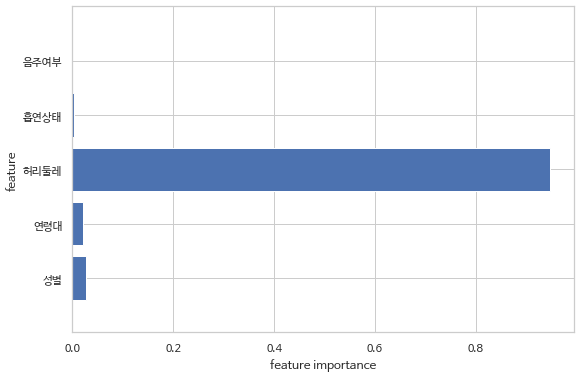

In [77]:
import numpy as np

def plot_feature_importances_data2(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(data2.columns[[3, 4, 7, 25, 26]])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data2.columns[[3, 4, 7, 25, 26]])   # 5개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)
  
plot_feature_importances_data2(tree)


# **랜덤 포레스트**

In [62]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.964
시험용 데이터 세트 정확도: 0.808


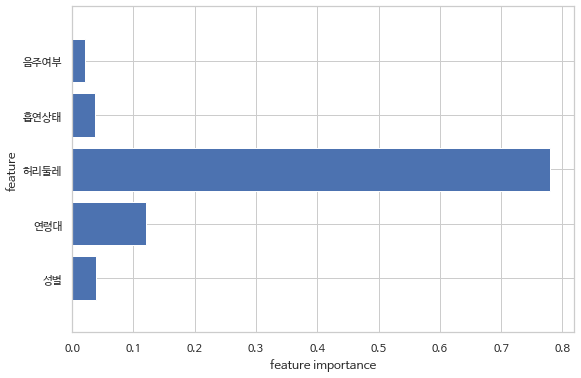

In [63]:
plot_feature_importances_data2(forest)

# **그래디언트 부스팅**

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.874
시험용 데이터 세트 정확도: 0.812


In [65]:
#나무 깊이 제한

gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.851
시험용 데이터 세트 정확도: 0.827


In [66]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.851
시험용 데이터 세트 정확도: 0.824


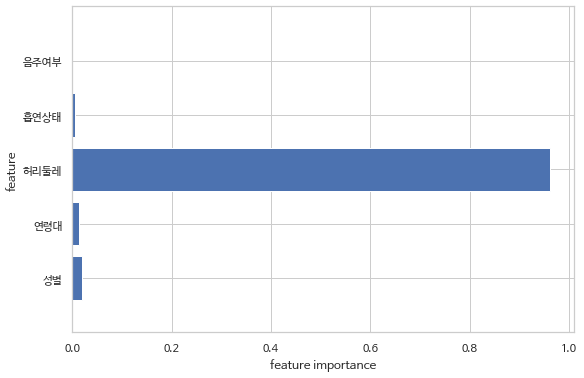

In [79]:
plot_feature_importances_data2(gbrt)

# **분류 모델 평가 (Evaluation)**

In [102]:
# 랜덤 포레스트와 단일 의사결정나무 비교

from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.79787234 0.82978723 0.84042553 0.87234043 0.85106383 0.87234043
 0.82795699 0.79569892 0.84946237 0.8172043 ]
Random forest:  [0.77659574 0.78723404 0.81914894 0.81914894 0.76595745 0.84042553
 0.78494624 0.80645161 0.86021505 0.77419355]
Accuracy mean
Decision tree :0.835
Random forest :0.803


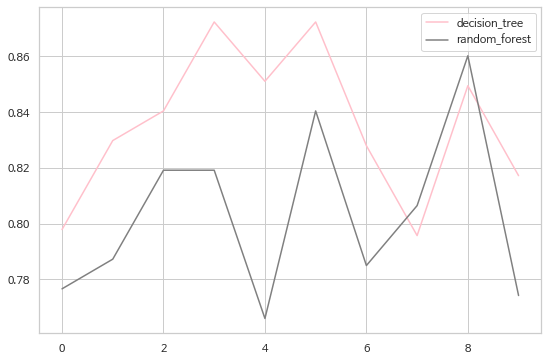

In [109]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot(color = ['pink', 'gray'])

# 랜덤 포레스트와 단일 의사결정나무 비교해봤을 때 대부분의 경우에서 decison_tree가 random_forest보다 정확도가 높은 것을 확인할 수 있다.

In [80]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean()))

Accuracy
Decision tree:  [0.79787234 0.82978723 0.84042553 0.87234043 0.85106383 0.87234043
 0.82795699 0.79569892 0.84946237 0.8172043 ]
Random forest:  [0.77659574 0.78723404 0.81914894 0.81914894 0.76595745 0.84042553
 0.78494624 0.80645161 0.86021505 0.77419355]
Gradient boosting:  [0.81914894 0.82978723 0.82978723 0.86170213 0.86170213 0.85106383
 0.8172043  0.78494624 0.84946237 0.8172043 ]
Accuracy mean
Decision tree :0.835
Random forest :0.803
Gradient boosting :0.832


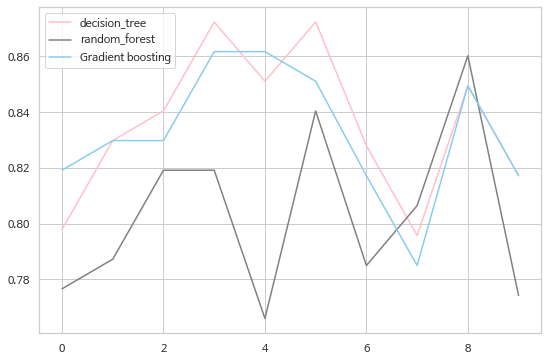

In [110]:
cv_list1 = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
            ['Gradient boosting',gbrt_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list1))
df.plot(color = ['pink', 'gray', 'skyblue'])


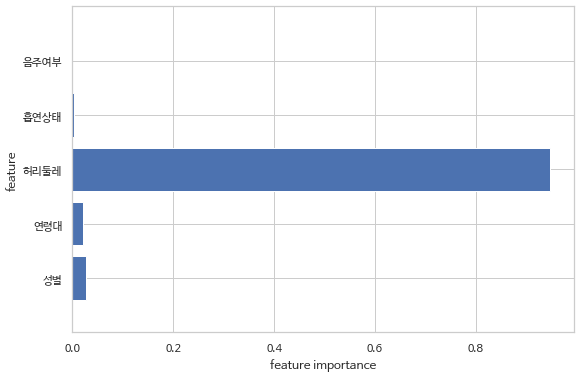

In [111]:
plot_feature_importances_data2(tree)

### 인사이트 도출

- 의사결정나무(0.835) -> 그래디언트 부스팅(0.832) -> 랜덤포레스트(0.803) 순으로 정화도가 높지만, 3개의 모델의 정확도가 거의 비슷한 것을 볼 수 있다.

- 의사결정나무는 초반에 정확도가 높지만, 뒤로 갈수록 정확도가 떨어지고, 랜덤포레스트는 그와 반대로 초반에는 정확도가 낮지만, 뒤에서 높아진다.
- BMI를 새로운 변수로 만들어 위험군과 안전군으로 나누었기 때문에 신장, 체중, BMI는 독립변수에서 제외하여 분석하였다. 예상했던대로 허리둘레가 비만에 가장 큰 영향을 미치는 변수로 나왔다. 예상했던 것과는 달리 음주여부가 비만여부에 영향을 미치지 못하는 것으로 나왔다. 
